# Advanced NLP with spaCy
# Chapter 1: Finding words, phrases, names, and concepts

In this chapter, you'll use your new skills to extract specific information from large volumes of text. You'll learn how to make the most of spaCy's data structures, and how to effectively combine statistical and rule-based approaches for text analysis.

Source: https://course.spacy.io/en/chapter2

# Import

In [1]:
import spacy

# Data Structures (1): Vocab, Lexemes and StringStore

- Vocab: stores data shared across multiple documents
- To save memory, spaCy encodes all strings to hash values
- Strings are only stored once in the StringStore via nlp.vocab.strings
- String store: lookup table in both directions
- Hashes can't be reversed – that's why we need to provide the shared vocab

In [2]:
nlp = spacy.blank("en")

nlp.vocab.strings.add("coffee")
coffee_hash = nlp.vocab.strings["coffee"]
coffee_string = nlp.vocab.strings[coffee_hash]

print(coffee_hash)
print(coffee_string)

3197928453018144401
coffee


- Look up the string and hash in nlp.vocab.strings OR doc.vocab.strings

In [3]:
doc = nlp("I love coffee")
print("hash value:", nlp.vocab.strings["coffee"])
print("string value:", nlp.vocab.strings[3197928453018144401])
print("hash value:", doc.vocab.strings["coffee"])

hash value: 3197928453018144401
string value: coffee
hash value: 3197928453018144401


- A Lexeme object is a context-independent entry in the vocabulary
- Can get a lexeme by looking up a string or hash ID in the vocab
- Lexemes expose attributes (like tokens)
- Lexemes don't have POS tags, dependencies, or entity labels (those are context-dependent)

In [4]:
doc = nlp("I love coffee")
lexeme = nlp.vocab["coffee"]

# Print the lexical attributes
print(lexeme.text, lexeme.orth, lexeme.is_alpha)

coffee 3197928453018144401 True


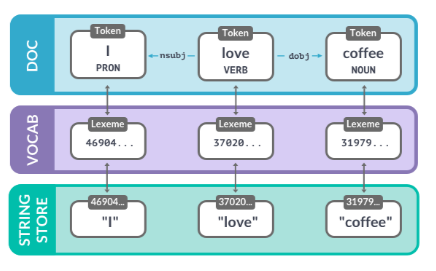

# Strings to hashes

In [5]:
doc = nlp("I have a cat")

# look up the hash for the word 'cat'
cat_hash = nlp.vocab.strings['cat']
print(cat_hash)

# look up the cat_hash to get the string
cat_string = nlp.vocab.strings[cat_hash]
print(cat_string)

5439657043933447811
cat


In [6]:
doc = nlp("David Bowie is a PERSON")

# look up the hash for the string label 'PERSON'
person_hash = nlp.vocab.strings['PERSON']
print(person_hash)

# look up the person_hash to get the string
person_string = nlp.vocab.strings[person_hash]
print(person_string)

380
PERSON


# Vocab, hashes and lexemes

Why does this code throw an error?

In [7]:
# # Create an English and German nlp object
# nlp = spacy.blank("en")
# nlp_de = spacy.blank("de")

# # Get the ID for the string 'Bowie'
# bowie_id = nlp.vocab.strings["Bowie"] # English nlp
# print(bowie_id)

# # Look up the ID for "Bowie" in the vocab
# print(nlp_de.vocab.strings[bowie_id]) # German nlp

In [8]:
# answer: the string "Bowie" isn't in the German vocab, so the hash can't be resolved in the string store
# To prevent this problem, add the word to the new vocab by processing a text or looking up the string, 
# or use the same vocab to resolve the hash back to a string.

# Data Structures (2): Doc, Span and Token

## Doc

- The Doc is one of the central data structures in spaCy. It's created automatically when you process a text with the nlp object. But you can also instantiate the class manually.
- After creating the nlp object, we can import the Doc class from spacy.tokens.
- Here we're creating a doc from three words. The spaces are a list of boolean values indicating whether the word is followed by a space. Every token includes that information – even the last one!
- The Doc class takes three arguments: the shared vocab, the words and the spaces.

In [9]:
# create an nlp object
nlp = spacy.blank("en")

# Import the Doc class
from spacy.tokens import Doc

# The words and spaces to create the doc from
words = ["Hello", "world", "!"]
spaces = [True, False, False]

# Create a doc manually
doc = Doc(nlp.vocab, words=words, spaces=spaces)

## Span

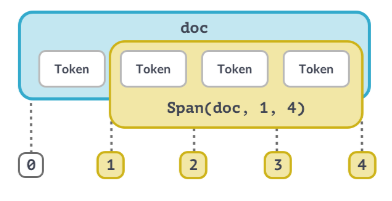

- A Span is a slice of a doc consisting of one or more tokens. The Span takes at least three arguments: the doc it refers to, and the start and end index of the span. Remember that the end index is exclusive!
- To create a Span manually, we can also import the class from spacy.tokens. We can then instantiate it with the doc and the span's start and end index, and an optional label argument.
- The doc.ents are writable, so we can add entities manually by overwriting it with a list of spans.

In [10]:
# Import the Doc and Span classes
from spacy.tokens import Doc, Span

# The words and spaces to create the doc from
words = ["Hello", "world", "!"]
spaces = [True, False, False]

# Create a doc manually
doc = Doc(nlp.vocab, words=words, spaces=spaces)

# Create a span manually
span = Span(doc, 0, 2)

print(span)

# Create a span with a label (optional)
span_with_label = Span(doc, 0, 2, label="GREETING")

print(span_with_label)
print(span_with_label.label)

# Add span to the doc.ents
doc.ents = [span_with_label]

for ent in doc.ents:
    print(ent)
    print(ent.label)
    
print(len(doc.ents))

Hello world
Hello world
12946562419758953770
Hello world
12946562419758953770
1


- The Doc and Span are very powerful and optimized for performance. They give you access to all references and relationships of the words and sentences.
- If your application needs to output strings, make sure to convert the doc as late as possible. If you do it too early, you'll lose all relationships between the tokens.
- To keep things consistent, try to use built-in token attributes wherever possible. For example, token.i for the token index.
- Also, don't forget to always pass in the shared vocab!

# Creating a Doc manually

In [11]:
# example 1
nlp = spacy.blank("en")

from spacy.tokens import Doc

# desired text: "spaCy is cool!"
words = ["spaCy", "is", "cool", "!"]
spaces = [True, True, False, False]

# create a doc from the words and spaces
doc = Doc(nlp.vocab, words = words, spaces = spaces)
print(doc.text)

spaCy is cool!


In [12]:
# example 2
nlp = spacy.blank("en")

from spacy.tokens import Doc

# desired text: "Go, get started!"
words = ["Go", ",", "get", "started", "!"]
spaces = [False, True, True, False, False]

doc = Doc(nlp.vocab, words = words, spaces = spaces)

print(doc)
print(doc.text)

Go, get started!
Go, get started!


In [13]:
# example 3
nlp = spacy.blank("en")

from spacy.tokens import Doc

# desired text = "Oh, really?!"
words = ["Oh", ",", "really", "?", "!"]
spaces = [False, True, False, False, False]

doc = Doc(nlp.vocab, words = words, spaces = spaces)

print(doc)
print(doc.text)

Oh, really?!
Oh, really?!


# Docs, spans and entities from scratch

- In this exercise, you’ll create the Doc and Span objects manually, and update the named entities – just like spaCy does behind the scenes. A shared nlp object has already been created.
- Import the Doc and Span classes from spacy.tokens.
- Use the Doc class directly to create a doc from the words and spaces.
- Create a Span for “David Bowie” from the doc and assign it the label "PERSON".
- Overwrite the doc.ents with a list of one entity, the “David Bowie” span.

In [14]:
nlp = spacy.blank("en")

from spacy.tokens import Doc, Span

words = ["I", "like", "David", "Bowie"]
spaces = [True, True, True, False]

# create a doc
doc = Doc(nlp.vocab, words = words, spaces = spaces)
print(doc.text)

# create a span for "David Bowie" and assign it the label "PERSON"
span = Span(doc, 2, 4, label = "PERSON")
print(span.text, span.label_)

# add the span to the doc's entities
doc.ents = [span]
print([(ent.text, ent.label_) for ent in doc.ents])

I like David Bowie
David Bowie PERSON
[('David Bowie', 'PERSON')]


# Data structures best practices

- The code in this example is trying to analyze a text and collect all proper nouns that are followed by a verb.

In [15]:
# this code is bad
# It only uses lists of strings instead of native token attributes. 
# This is often less efficient, and can't express complex relationships.
# Always convert the results to strings as late as possible, and try 
# to use native token attributes to keep things consistent.

nlp = spacy.load("en_core_web_sm")
doc = nlp("Berlin looks like a nice city")

# Get all tokens and part-of-speech tags
token_texts = [token.text for token in doc]
pos_tags = [token.pos_ for token in doc]

for index, pos in enumerate(pos_tags):
    # Check if the current token is a proper noun
    if pos == "PROPN":
        # Check if the next token is a verb
        if pos_tags[index + 1] == "VERB":
            result = token_texts[index]
            print("Found proper noun before a verb:", result)

Found proper noun before a verb: Berlin


In [16]:
# this code is good
# rewritten code using native token attributes instead of lists of token_texts and pos_tags
# Loop over each token in the doc and check the token.pos_ attribute.
# Use doc[token.i + 1] to check for the next token and its .pos_ attribute.
# If a proper noun before a verb is found, print its token.text.

nlp = spacy.load("en_core_web_sm")
doc = nlp("Berlin looks like a nice city")

for token in doc:
    # Check if the current token is a proper noun
    if token.pos_ == "PROPN":
        # Check if the next token is a verb
        if doc[token.i + 1].pos_ == "VERB":
            print("Found proper noun before a verb:", token.text)

Found proper noun before a verb: Berlin


# Word vectors and semantic similarity

- In this lesson, you'll learn how to use spaCy to predict how similar documents, spans or tokens are to each other.
- You'll also learn how to use word vectors and how to take advantage of them in your NLP application.
- spaCy can compare two objects and predict similarity
- Doc.similarity(), Span.similarity() and Token.similarity()
- Take another object and return a similarity score (0 to 1)
- Important: needs a pipeline that has word vectors included, for example:
    - ✅ en_core_web_md (medium)
    - ✅ en_core_web_lg (large)
    - 🚫 NOT en_core_web_sm (small)
- If you want to use vectors, always go with a pipeline that ends in "md" or "lg". You can find more details on this in the documentation: https://spacy.io/models

In [17]:
# before using a pipeline for the first time:
# python -m spacy download en_core_web_sm

In [19]:
# similarity example 1: docs
nlp = spacy.load("en_core_web_md")

# Compare two documents
doc1 = nlp("I like fast food")
doc2 = nlp("I like pizza")
print(doc1.similarity(doc2))

0.869833325851152
0.6850197911262512


In [20]:
# similarity example 2: tokens (word vectors)

# Compare two tokens
doc = nlp("I like pizza and pasta")
token1 = doc[2]
token2 = doc[4]
print(token1.similarity(token2))

0.6850197911262512


In [21]:
# similarity example 3: different types of objects

# Compare a document with a token
doc = nlp("I like pizza")
token = nlp("soap")[0]

print(doc.similarity(token))

# Compare a span with a document
span = nlp("I like pizza and pasta")[2:5]
doc = nlp("McDonalds sells burgers")

print(span.similarity(doc))

0.18213694934365615
0.4719003666806404


How does spaCy predict similarity?

- Similarity is determined using word vectors
- Multi-dimensional meaning representations of words
- Generated using an algorithm like Word2Vec and lots of text
- Can be added to spaCy's pipelines
- Default: cosine similarity, but can be adjusted
- Doc and Span vectors default to average of token vectors
- Short phrases are better than long documents with many irrelevant words

In [22]:
# we can process a text and look up a token's vector using the .vector attribute
# the result is a 300-dimensional vector of the word "banana"

doc = nlp("I have a banana")
# Access the vector via the token.vector attribute
print(doc[3].vector)

[ 0.20778  -2.4151    0.36605   2.0139   -0.23752  -3.1952   -0.2952
  1.2272   -3.4129   -0.54969   0.32634  -1.0813    0.55626   1.5195
  0.97797  -3.1816   -0.37207  -0.86093   2.1509   -4.0845    0.035405
  3.5702   -0.79413  -1.7025   -1.6371   -3.198    -1.9387    0.91166
  0.85409   1.8039   -1.103    -2.5274    1.6365   -0.82082   1.0278
 -1.705     1.5511   -0.95633  -1.4702   -1.865    -0.19324  -0.49123
  2.2361    2.2119    3.6654    1.7943   -0.20601   1.5483   -1.3964
 -0.50819   2.1288   -2.332     1.3539   -2.1917    1.8923    0.28472
  0.54285   1.2309    0.26027   1.9542    1.1739   -0.40348   3.2028
  0.75381  -2.7179   -1.3587   -1.1965   -2.0923    2.2855   -0.3058
 -0.63174   0.70083   0.16899   1.2325    0.97006  -0.23356  -2.094
 -1.737     3.6075   -1.511    -0.9135    0.53878   0.49268   0.44751
  0.6315    1.4963    4.1725    2.1961   -1.2409    0.4214    2.9678
  1.841     3.0133   -4.4652    0.96521  -0.29787   4.3386   -1.2527
 -1.7734   -3.5637   -0.20035

In [23]:
# there's no objective definition of what's similar and what isn't. 
# It always depends on the context and what your application needs to do.

# Here's an example: spaCy's default word vectors assign a very high similarity score to "I like cats" 
# and "I hate cats". This makes sense, because both texts express sentiment about cats. But in a different 
# application context, you might want to consider the phrases as very dissimilar, because they talk about opposite sentiments.

doc1 = nlp("I like cats")
doc2 = nlp("I hate cats")

print(doc1.similarity(doc2))

0.9530093158841214


# Inspecting word vectors

In [25]:
# "en_core_web_md" includes around 20,000 word vectors

# load the pipeline
nlp = spacy.load("en_core_web_md")

# process a text
doc = nlp("Two bananas in pyjamas")

# get the vector for the token "bananas"
bananas_vector = doc[1].vector
print(bananas_vector)

[-2.1689e-01 -2.5989e+00 -1.3144e+00  2.2500e+00 -4.6767e-01 -2.0695e+00
 -6.3379e-01 -4.0222e-01 -3.4022e+00 -3.6932e-01 -7.9938e-01 -1.0412e+00
  9.3756e-01  1.6070e+00  8.8330e-01 -2.8483e+00  1.3349e-01 -3.1656e+00
  8.1896e-01 -4.8113e+00  1.5655e+00  1.6665e+00 -4.7081e-01 -1.9475e+00
 -1.1779e+00 -1.3810e+00 -2.0071e+00 -2.1639e-01  9.0609e-01  1.5279e+00
  1.2587e-04 -2.9000e+00  7.6069e-01 -2.2825e+00  1.2495e-02 -1.5653e+00
  2.0052e+00 -1.7747e+00  5.9220e-01 -1.1428e+00 -1.3441e+00  3.4784e-01
  1.7492e+00  1.9086e+00  1.0600e+00  1.2965e+00  4.1431e-01  7.9416e-01
 -1.1277e+00 -1.1403e+00  7.5891e-01 -9.4419e-01  1.4413e+00 -2.2554e+00
  1.6226e-01  3.8901e-01  1.2299e-01  1.1577e+00  1.5524e+00  1.3853e+00
  1.1112e+00  7.5767e-01  3.9431e+00 -2.8506e-01 -2.1645e+00 -1.0862e+00
 -1.4973e+00 -1.2781e+00  2.4643e+00 -1.5886e+00  2.5679e-01  6.4918e-01
  1.6809e-01  5.7693e-01  3.1121e-01 -4.5278e-01 -2.7555e+00 -2.1846e+00
  4.4865e+00  2.7107e-01 -5.3831e-01  8.3013e-01  6

# Comparing similarities

In [26]:
# exercise 1
# print the similarity score of doc1 and doc2

nlp = spacy.load("en_core_web_md")

doc1 = nlp("It's a warm summer day")
doc2 = nlp("It's sunny outside")

similarity = doc1.similarity(doc2)
print(similarity)

0.8220092482601077


In [27]:
# exercise 2
# Use the token.similarity method to compare token1 to token2 and print the result.

nlp = spacy.load("en_core_web_md")

doc = nlp("TV and books")
token1, token2 = doc[0], doc[2]

# Get the similarity of the tokens "TV" and "books"
similarity = token1.similarity(token2)
print(similarity)

0.10219937562942505


In [31]:
# exercise 3
# Create spans for “great restaurant”/“really nice bar”.
# Use span.similarity to compare them and print the result.

nlp = spacy.load("en_core_web_md")

doc = nlp("This was a great restaurant. Afterwards, we went to a really nice bar.")

span1 = Span(doc, 3, 5)
span2 = Span(doc, 12, 15)

similarity = span1.similarity(span2)
print(similarity)

0.6348509788513184


# Combining predictions and rules

Combining predictions from statistical models with rule-based systems is one of the most powerful tricks you should have in your NLP toolbox.

**Statistical** models are useful if your application needs to be able to generalize based on a few examples.

For instance, detecting product or person names usually benefits from a trained model. Instead of providing a list of all person names ever, your application will be able to predict whether a span of tokens is a person name. Similarly, you can predict dependency labels to find subject/object relationships.

To do this, you would use spaCy's entity recognizer, dependency parser or part-of-speech tagger.

**Rule-based** approaches on the other hand come in handy if there's a more or less finite number of instances you want to find. For example, all countries or cities of the world, drug names or even dog breeds.

In spaCy, you can achieve this with custom tokenization rules, as well as the matcher and phrase matcher.

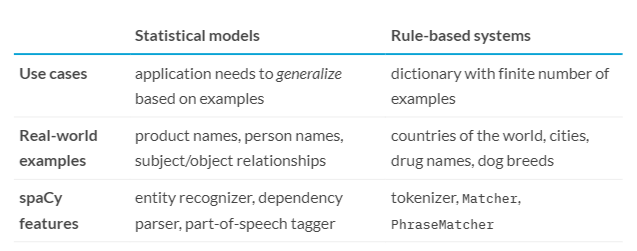

In the last chapter, you learned how to use spaCy's rule-based matcher to find complex patterns in your texts. Here's a quick recap.

The matcher is initialized with the shared vocabulary – usually nlp.vocab.

Patterns are lists of dictionaries, and each dictionary describes one token and its attributes. Patterns can be added to the matcher using the matcher.add method.

Operators let you specify how often to match a token. For example, "+" will match one or more times.

Calling the matcher on a doc object will return a list of the matches. Each match is a tuple consisting of an ID, and the start and end token index in the document.

In [32]:
# Initialize with the shared vocab
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

# Patterns are lists of dictionaries describing the tokens
pattern = [{"LEMMA": "love", "POS": "VERB"}, {"LOWER": "cats"}]
matcher.add("LOVE_CATS", [pattern])

# Operators can specify how often a token should be matched
pattern = [{"TEXT": "very", "OP": "+"}, {"TEXT": "happy"}]
matcher.add("VERY_HAPPY", [pattern])

# Calling matcher on doc returns list of (match_id, start, end) tuples
doc = nlp("I love cats and I'm very very happy")
matches = matcher(doc)

Here's an example of a matcher rule for "golden retriever".

If we iterate over the matches returned by the matcher, we can get the match ID and the start and end index of the matched span. We can then find out more about it. Span objects give us access to the original document and all other token attributes and linguistic features predicted by a model.

For example, we can get the span's root token. If the span consists of more than one token, this will be the token that decides the category of the phrase. For example, the root of "Golden Retriever" is "Retriever". We can also find the head token of the root. This is the syntactic "parent" that governs the phrase – in this case, the verb "have".

Finally, we can look at the previous token and its attributes. In this case, it's a determiner, the article "a".

In [33]:
matcher = Matcher(nlp.vocab)
matcher.add("DOG", [[{"LOWER": "golden"}, {"LOWER": "retriever"}]])
doc = nlp("I have a Golden Retriever")

for match_id, start, end in matcher(doc):
    span = doc[start:end]
    print("Matched span:", span.text)
    # Get the span's root token and root head token
    print("Root token:", span.root.text)
    print("Root head token:", span.root.head.text)
    # Get the previous token and its POS tag
    print("Previous token:", doc[start - 1].text, doc[start - 1].pos_)

Matched span: Golden Retriever
Root token: Retriever
Root head token: have
Previous token: a DET


- PhraseMatcher like regular expressions or keyword search – but with access to the tokens!
- Takes Doc object as patterns
- More efficient and faster than the Matcher
- Great for matching large word lists

Here's an example.

The phrase matcher can be imported from spacy.matcher and follows the same API as the regular matcher.

Instead of a list of dictionaries, we pass in a Doc object as the pattern.

We can then iterate over the matches in the text, which gives us the match ID, and the start and end of the match. This lets us create a Span object for the matched tokens "Golden Retriever" to analyze it in context.

In [36]:
from spacy.matcher import PhraseMatcher

matcher = PhraseMatcher(nlp.vocab)

pattern = nlp("Golden Retriever")
matcher.add("DOG", [pattern])
doc = nlp("I have a Golden Retriever")

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Get the matched span
    span = doc[start:end]
    print("Matched span:", span.text)

Matched span: Golden Retriever


# Debugging patterns

In [37]:
# Why does this pattern not match the tokens “Silicon Valley” in the doc?
pattern = [{"LOWER": "silicon"}, {"TEXT": " "}, {"LOWER": "valley"}]
doc = nlp("Can Silicon Valley workers rein in big tech from within?")

# answer: The tokenizer doesn’t create tokens for single spaces, so there’s no token with the value " " in between.
# The tokenizer already takes care of splitting off whitespace and each dictionary in the pattern describes one token.

In [41]:
# Edit pattern1 so that it correctly matches all case-insensitive mentions of "Amazon" plus a title-cased proper noun.
# Edit pattern2 so that it correctly matches all case-insensitive mentions of "ad-free", plus the following noun.

import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
doc = nlp(
    "Twitch Prime, the perks program for Amazon Prime members offering free "
    "loot, games and other benefits, is ditching one of its best features: "
    "ad-free viewing. According to an email sent out to Amazon Prime members "
    "today, ad-free viewing will no longer be included as a part of Twitch "
    "Prime for new members, beginning on September 14. However, members with "
    "existing annual subscriptions will be able to continue to enjoy ad-free "
    "viewing until their subscription comes up for renewal. Those with "
    "monthly subscriptions will have access to ad-free viewing until October 15."
)

# Create the match patterns
pattern1 = [{"LOWER": "Amazon"}, {"IS_TITLE": True, "POS": "PROPN"}]
pattern2 = [{"LOWER": "ad-free"}, {"POS": "NOUN"}]

# Initialize the Matcher and add the patterns
matcher = Matcher(nlp.vocab)
matcher.add("PATTERN1", [pattern1])
matcher.add("PATTERN2", [pattern2])

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Print pattern string name and text of matched span
    print(doc.vocab.strings[match_id], doc[start:end].text)

print([token for token in doc])

[Twitch, Prime, ,, the, perks, program, for, Amazon, Prime, members, offering, free, loot, ,, games, and, other, benefits, ,, is, ditching, one, of, its, best, features, :, ad, -, free, viewing, ., According, to, an, email, sent, out, to, Amazon, Prime, members, today, ,, ad, -, free, viewing, will, no, longer, be, included, as, a, part, of, Twitch, Prime, for, new, members, ,, beginning, on, September, 14, ., However, ,, members, with, existing, annual, subscriptions, will, be, able, to, continue, to, enjoy, ad, -, free, viewing, until, their, subscription, comes, up, for, renewal, ., Those, with, monthly, subscriptions, will, have, access, to, ad, -, free, viewing, until, October, 15, .]


In [42]:
# answer:

import spacy
from spacy.matcher import Matcher

nlp = spacy.load("en_core_web_sm")
doc = nlp(
    "Twitch Prime, the perks program for Amazon Prime members offering free "
    "loot, games and other benefits, is ditching one of its best features: "
    "ad-free viewing. According to an email sent out to Amazon Prime members "
    "today, ad-free viewing will no longer be included as a part of Twitch "
    "Prime for new members, beginning on September 14. However, members with "
    "existing annual subscriptions will be able to continue to enjoy ad-free "
    "viewing until their subscription comes up for renewal. Those with "
    "monthly subscriptions will have access to ad-free viewing until October 15."
)

# Create the match patterns
pattern1 = [{"LOWER": "amazon"}, {"IS_TITLE": True, "POS": "PROPN"}]
pattern2 = [{"LOWER": "ad"}, {"TEXT": "-"}, {"LOWER": "free"}, {"POS": "NOUN"}]

# Initialize the Matcher and add the patterns
matcher = Matcher(nlp.vocab)
matcher.add("PATTERN1", [pattern1])
matcher.add("PATTERN2", [pattern2])

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Print pattern string name and text of matched span
    print(doc.vocab.strings[match_id], doc[start:end].text)

PATTERN1 Amazon Prime
PATTERN2 ad-free viewing
PATTERN1 Amazon Prime
PATTERN2 ad-free viewing
PATTERN2 ad-free viewing
PATTERN2 ad-free viewing


# Efficient phrase matching

Sometimes it’s more efficient to match exact strings instead of writing patterns describing the individual tokens. This is especially true for finite categories of things – like all countries of the world. We already have a list of countries, so let’s use this as the basis of our information extraction script. A list of string names is available as the variable COUNTRIES.

- Import the PhraseMatcher and initialize it with the shared vocab as the variable matcher.
- Add the phrase patterns and call the matcher on the doc.

In [1]:
import json
json_string = '{ "1":"Red", "2":"Blue", "3":"Green"}'
parsed_json = json.loads(json_string)
print(parsed_json['1'])

Red


In [3]:
import json
import spacy

with open("countries.txt", encoding="utf8") as f:
    COUNTRIES = json.loads(f.read())

nlp = spacy.blank("en")
doc = nlp("Czech Republic may help Slovakia protect its airspace")

# Import the PhraseMatcher and initialize it
from spacy.matcher import PhraseMatcher

matcher = PhraseMatcher(nlp.vocab)

# Create pattern Doc objects and add them to the matcher
# This is the faster version of: [nlp(country) for country in COUNTRIES]
patterns = list(nlp.pipe(COUNTRIES))
matcher.add("COUNTRY", patterns)

# Call the matcher on the test document and print the result
matches = matcher(doc)
print([doc[start:end] for match_id, start, end in matches])

[Czech Republic, Slovakia]


# Extracting countries and relationships

In the previous exercise, you wrote a script using spaCy’s PhraseMatcher to find country names in text. Let’s use that country matcher on a longer text, analyze the syntax and update the document’s entities with the matched countries.

- Iterate over the matches and create a Span with the label "GPE" (geopolitical entity).
- Overwrite the entities in doc.ents and add the matched span.
- Get the matched span’s root head token.
- Print the text of the head token and the span.

In [5]:
import spacy
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span
import json

with open("countries.txt", encoding="utf8") as f:
    COUNTRIES = json.loads(f.read())
with open("country_text.txt", encoding="utf8") as f:
    TEXT = f.read()

nlp = spacy.load("en_core_web_sm")
matcher = PhraseMatcher(nlp.vocab)
patterns = list(nlp.pipe(COUNTRIES))
matcher.add("COUNTRY", patterns)

# Create a doc and reset existing entities
doc = nlp(TEXT)
doc.ents = []

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Create a Span with the label for "GPE"
    span = Span(doc, start, end, label="GPE")

    # Overwrite the doc.ents and add the span
    doc.ents = list(doc.ents) + [span]

    # Get the span's root head token
    span_root_head = span.root.head
    # Print the text of the span root's head token and the span text
    print(span_root_head.text, "-->", span.text)

# Print the entities in the document
print([(ent.text, ent.label_) for ent in doc.ents if ent.label_ == "GPE"])

have --> Holy See
as --> Taiwan
of --> Denmark
consists --> Faroe Islands
of --> Netherlands
of --> Netherlands
proper --> Aruba
Aruba --> Curaçao
Wales --> Ireland
of --> New Zealand
of --> Norway
of --> Australia
of --> China
Åland --> France
Realm --> Netherlands
[('Holy See', 'GPE'), ('Taiwan', 'GPE'), ('Denmark', 'GPE'), ('Faroe Islands', 'GPE'), ('Netherlands', 'GPE'), ('Netherlands', 'GPE'), ('Aruba', 'GPE'), ('Curaçao', 'GPE'), ('Ireland', 'GPE'), ('New Zealand', 'GPE'), ('Norway', 'GPE'), ('Australia', 'GPE'), ('China', 'GPE'), ('France', 'GPE'), ('Netherlands', 'GPE')]
